In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

covid_df = pd.read_csv('merged_df_v1.csv')

In [2]:
print(covid_df.columns)
print(covid_df.shape)
covid_df.head(20)

Index(['comm_county', 'comm_county_fips', 'comm_state',
       'comm_county_population', 'comm_health_service_area_number',
       'comm_health_service_area', 'comm_health_service_area_population',
       'comm_covid_inpatient_bed_utilization',
       'comm_covid_hospital_admissions_per_100k', 'comm_covid_cases_per_100k',
       'comm_covid-19_community_level', 'comm_date_updated',
       'date_state_index', 'vacc_Date', 'vacc_MMWR_week', 'vacc_Location',
       'vacc_Distributed', 'vacc_Distributed_Janssen',
       'vacc_Distributed_Moderna', 'vacc_Distributed_Pfizer',
       'vacc_Distributed_Unk_Manuf', 'vacc_Dist_Per_100K',
       'vacc_Distributed_Per_100k_5Plus', 'vacc_Distributed_Per_100k_12Plus',
       'vacc_Distributed_Per_100k_18Plus', 'vacc_Distributed_Per_100k_65Plus',
       'vacc_Administered', 'vacc_Administered_5Plus',
       'vacc_Administered_12Plus', 'vacc_Administered_18Plus',
       'vacc_Administered_65Plus', 'vacc_Administered_Janssen',
       'vacc_Administered

,comm_county,comm_county_fips,comm_state,comm_county_population,comm_health_service_area_number,comm_health_service_area,comm_health_service_area_population,comm_covid_inpatient_bed_utilization,comm_covid_hospital_admissions_per_100k,comm_covid_cases_per_100k,...,vacc_Additional_Doses_50Plus,vacc_Additional_Doses_50Plus_Vax_Pct,vacc_Additional_Doses_65Plus,vacc_Additional_Doses_65Plus_Vax_Pct,vacc_Additional_Doses_Moderna,vacc_Additional_Doses_Pfizer,vacc_Additional_Doses_Janssen,vacc_Additional_Doses_Unk_Manuf,vacc_State,date_state_county_index
0,Hawaii,15001,Hawaii,201513.0,823,"Hawaii, HI",201513.0,5.4,9.4,198.50,...,334683.0,68.6,187630.0,76.7,240377.0,290993.0,5904.0,1.0,Hawaii,2022-02-24-Hawaii-Hawaii
1,Kauai,15007,Hawaii,72293.0,822,"Kauai, HI",72293.0,3.6,4.1,280.80,...,334683.0,68.6,187630.0,76.7,240377.0,290993.0,5904.0,1.0,Hawaii,2022-02-24-Hawaii-Kauai
2,Maui,15009,Hawaii,167417.0,821,"Honolulu (Honolulu), HI - Maui, HI",1142066.0,6.2,11.6,169.04,...,334683.0,68.6,187630.0,76.7,240377.0,290993.0,5904.0,1.0,Hawaii,2022-02-24-Hawaii-Maui
3,Kalawao,15005,Hawaii,86.0,821,"Honolulu (Honolulu), HI - Maui, HI",1142066.0,6.2,11.6,0.00,...,334683.0,68.6,187630.0,76.7,240377.0,290993.0,5904.0,1.0,Hawaii,2022-02-24-Hawaii-Kalawao
4,Honolulu,15003,Hawaii,974563.0,821,"Honolulu (Honolulu), HI - Maui, HI",1142066.0,6.2,11.6,135.55,...,334683.0,68.6,187630.0,76.7,240377.0,290993.0,5904.0,1.0,Hawaii,2022-02-24-Hawaii-Honolulu
5,Hawaii,15001,Hawaii,201513.0,823,"Hawaii, HI",201513.0,3.6,4.5,111.16,...,336946.0,69.0,188635.0,77.1,242538.0,294206.0,5966.0,1.0,Hawaii,2022-03-03-Hawaii-Hawaii
6,Kauai,15007,Hawaii,72293.0,822,"Kauai, HI",72293.0,2.0,1.4,165.99,...,336946.0,69.0,188635.0,77.1,242538.0,294206.0,5966.0,1.0,Hawaii,2022-03-03-Hawaii-Kauai
7,Maui,15009,Hawaii,167417.0,821,"Honolulu (Honolulu), HI - Maui, HI",1142066.0,4.8,7.3,114.09,...,336946.0,69.0,188635.0,77.1,242538.0,294206.0,5966.0,1.0,Hawaii,2022-03-03-Hawaii-Maui
8,Kalawao,15005,Hawaii,86.0,821,"Honolulu (Honolulu), HI - Maui, HI",1142066.0,4.8,7.3,0.00,...,336946.0,69.0,188635.0,77.1,242538.0,294206.0,5966.0,1.0,Hawaii,2022-03-03-Hawaii-Kalawao
9,Honolulu,15003,Hawaii,974563.0,821,"Honolulu (Honolulu), HI - Maui, HI",1142066.0,4.8,7.3,100.56,...,336946.0,69.0,188635.0,77.1,242538.0,294206.0,5966.0,1.0,Hawaii,2022-03-03-Hawaii-Honolulu


In [3]:
covid_df.columns

Index(['comm_county', 'comm_county_fips', 'comm_state',
       'comm_county_population', 'comm_health_service_area_number',
       'comm_health_service_area', 'comm_health_service_area_population',
       'comm_covid_inpatient_bed_utilization',
       'comm_covid_hospital_admissions_per_100k', 'comm_covid_cases_per_100k',
       'comm_covid-19_community_level', 'comm_date_updated',
       'date_state_index', 'vacc_Date', 'vacc_MMWR_week', 'vacc_Location',
       'vacc_Distributed', 'vacc_Distributed_Janssen',
       'vacc_Distributed_Moderna', 'vacc_Distributed_Pfizer',
       'vacc_Distributed_Unk_Manuf', 'vacc_Dist_Per_100K',
       'vacc_Distributed_Per_100k_5Plus', 'vacc_Distributed_Per_100k_12Plus',
       'vacc_Distributed_Per_100k_18Plus', 'vacc_Distributed_Per_100k_65Plus',
       'vacc_Administered', 'vacc_Administered_5Plus',
       'vacc_Administered_12Plus', 'vacc_Administered_18Plus',
       'vacc_Administered_65Plus', 'vacc_Administered_Janssen',
       'vacc_Administered

## Checking Missing Values

In [4]:
covid_df.isnull().sum().head(50)

comm_county                                     0
comm_county_fips                                0
comm_state                                      0
comm_county_population                          0
comm_health_service_area_number                 0
comm_health_service_area                        0
comm_health_service_area_population             0
comm_covid_inpatient_bed_utilization           99
comm_covid_hospital_admissions_per_100k        10
comm_covid_cases_per_100k                       0
comm_covid-19_community_level                   7
comm_date_updated                               0
date_state_index                                0
vacc_Date                                       0
vacc_MMWR_week                                  0
vacc_Location                                   0
vacc_Distributed                                0
vacc_Distributed_Janssen                        0
vacc_Distributed_Moderna                        0
vacc_Distributed_Pfizer                         0


Not many missing values, not much need for imputting, mainly only in comm_covid_inpatient_bed_utilization (99 missing) and
comm_covid_hospital_admissions_per_100k (10 missing)

## Testing Potential Response Variables

<AxesSubplot:xlabel='comm_covid_cases_per_100k', ylabel='Density'>

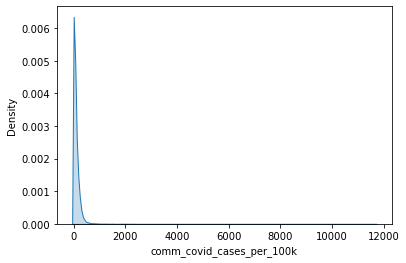

In [5]:
response_clean = covid_df['comm_covid_cases_per_100k']
sns.kdeplot(response_clean, fill=True, bw_method = .1)

<AxesSubplot:xlabel='comm_covid_hospital_admissions_per_100k', ylabel='Density'>

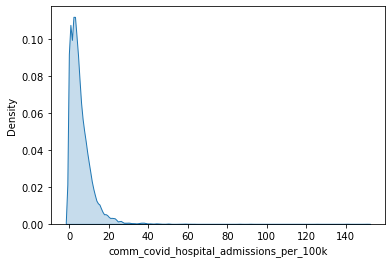

In [6]:
response_clean_2 = covid_df['comm_covid_hospital_admissions_per_100k']
sns.kdeplot(response_clean_2, fill=True, bw_method = .1)

<AxesSubplot:xlabel='comm_covid_inpatient_bed_utilization', ylabel='Density'>

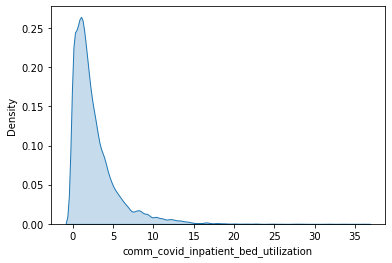

In [7]:
response_clean_3 = covid_df['comm_covid_inpatient_bed_utilization']
sns.kdeplot(response_clean_3, fill=True, bw_method = .1)

In [8]:
covid_df['comm_covid-19_community_level']

0           Low
1        Medium
2        Medium
3        Medium
4        Medium
          ...  
53392    Medium
53393    Medium
53394    Medium
53395    Medium
53396    Medium
Name: comm_covid-19_community_level, Length: 53397, dtype: object

## Continuous

In [9]:
num_cols = covid_df._get_numeric_data().columns
num_cols

Index(['comm_county_fips', 'comm_county_population',
       'comm_health_service_area_number',
       'comm_health_service_area_population',
       'comm_covid_inpatient_bed_utilization',
       'comm_covid_hospital_admissions_per_100k', 'comm_covid_cases_per_100k',
       'vacc_MMWR_week', 'vacc_Distributed', 'vacc_Distributed_Janssen',
       'vacc_Distributed_Moderna', 'vacc_Distributed_Pfizer',
       'vacc_Distributed_Unk_Manuf', 'vacc_Dist_Per_100K',
       'vacc_Distributed_Per_100k_5Plus', 'vacc_Distributed_Per_100k_12Plus',
       'vacc_Distributed_Per_100k_18Plus', 'vacc_Distributed_Per_100k_65Plus',
       'vacc_Administered', 'vacc_Administered_5Plus',
       'vacc_Administered_12Plus', 'vacc_Administered_18Plus',
       'vacc_Administered_65Plus', 'vacc_Administered_Janssen',
       'vacc_Administered_Moderna', 'vacc_Administered_Pfizer',
       'vacc_Administered_Unk_Manuf', 'vacc_Admin_Per_100K',
       'vacc_Admin_Per_100k_5Plus', 'vacc_Admin_Per_100k_12Plus',
       'v

In [10]:
conti = covid_df.loc[:, ['comm_county_fips', 'comm_county_population',
       'comm_health_service_area_number',
       'comm_health_service_area_population',
       'comm_covid_inpatient_bed_utilization',
       'comm_covid_hospital_admissions_per_100k', 'comm_covid_cases_per_100k',
       'vacc_MMWR_week', 'vacc_Distributed', 'vacc_Distributed_Janssen',
       'vacc_Distributed_Moderna', 'vacc_Distributed_Pfizer',
       'vacc_Distributed_Unk_Manuf', 'vacc_Dist_Per_100K',
       'vacc_Distributed_Per_100k_5Plus', 'vacc_Distributed_Per_100k_12Plus',
       'vacc_Distributed_Per_100k_18Plus', 'vacc_Distributed_Per_100k_65Plus',
       'vacc_Administered', 'vacc_Administered_5Plus',
       'vacc_Administered_12Plus', 'vacc_Administered_18Plus',
       'vacc_Administered_65Plus', 'vacc_Administered_Janssen',
       'vacc_Administered_Moderna', 'vacc_Administered_Pfizer',
       'vacc_Administered_Unk_Manuf', 'vacc_Admin_Per_100K',
       'vacc_Admin_Per_100k_5Plus', 'vacc_Admin_Per_100k_12Plus',
       'vacc_Admin_Per_100k_18Plus', 'vacc_Admin_Per_100k_65Plus',
       'vacc_Recip_Administered', 'vacc_Administered_Dose1_Recip',
       'vacc_Administered_Dose1_Pop_Pct',
       'vacc_Administered_Dose1_Recip_5Plus',
       'vacc_Administered_Dose1_Recip_5PlusPop_Pct',
       'vacc_Administered_Dose1_Recip_12Plus',
       'vacc_Administered_Dose1_Recip_12PlusPop_Pct',
       'vacc_Administered_Dose1_Recip_18Plus',
       'vacc_Administered_Dose1_Recip_18PlusPop_Pct',
       'vacc_Administered_Dose1_Recip_65Plus',
       'vacc_Administered_Dose1_Recip_65PlusPop_Pct',
       'vacc_Series_Complete_Yes', 'vacc_Series_Complete_Pop_Pct',
       'vacc_Series_Complete_5Plus', 'vacc_Series_Complete_5PlusPop_Pct',
       'vacc_Series_Complete_12Plus', 'vacc_Series_Complete_12PlusPop_Pct',
       'vacc_Series_Complete_18Plus', 'vacc_Series_Complete_18PlusPop_Pct',
       'vacc_Series_Complete_65Plus', 'vacc_Series_Complete_65PlusPop_Pct',
       'vacc_Series_Complete_Janssen', 'vacc_Series_Complete_Moderna',
       'vacc_Series_Complete_Pfizer', 'vacc_Series_Complete_Unk_Manuf',
       'vacc_Series_Complete_Janssen_5Plus',
       'vacc_Series_Complete_Moderna_5Plus',
       'vacc_Series_Complete_Pfizer_5Plus',
       'vacc_Series_Complete_Unk_Manuf_5Plus',
       'vacc_Series_Complete_Janssen_12Plus',
       'vacc_Series_Complete_Moderna_12Plus',
       'vacc_Series_Complete_Pfizer_12Plus',
       'vacc_Series_Complete_Unk_Manuf_12Plus',
       'vacc_Series_Complete_Janssen_18Plus',
       'vacc_Series_Complete_Moderna_18Plus',
       'vacc_Series_Complete_Pfizer_18Plus',
       'vacc_Series_Complete_Unk_Manuf_18Plus',
       'vacc_Series_Complete_Janssen_65Plus',
       'vacc_Series_Complete_Moderna_65Plus',
       'vacc_Series_Complete_Pfizer_65Plus',
       'vacc_Series_Complete_Unk_Manuf_65Plus', 'vacc_Additional_Doses',
       'vacc_Additional_Doses_Vax_Pct', 'vacc_Additional_Doses_12Plus',
       'vacc_Additional_Doses_12Plus_Vax_Pct', 'vacc_Additional_Doses_18Plus',
       'vacc_Additional_Doses_18Plus_Vax_Pct', 'vacc_Additional_Doses_50Plus',
       'vacc_Additional_Doses_50Plus_Vax_Pct', 'vacc_Additional_Doses_65Plus',
       'vacc_Additional_Doses_65Plus_Vax_Pct', 'vacc_Additional_Doses_Moderna',
       'vacc_Additional_Doses_Pfizer', 'vacc_Additional_Doses_Janssen',
       'vacc_Additional_Doses_Unk_Manuf']]

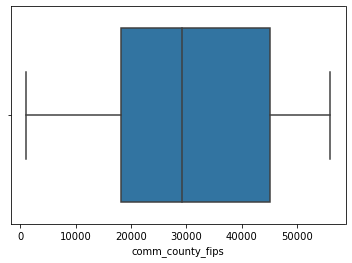

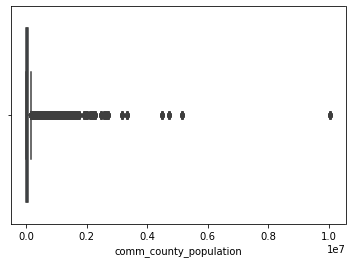

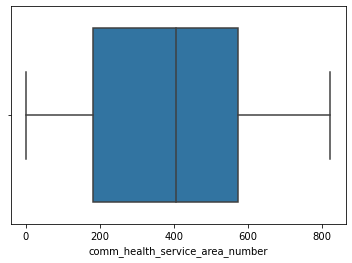

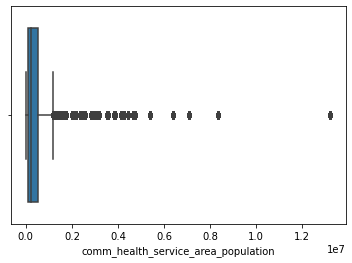

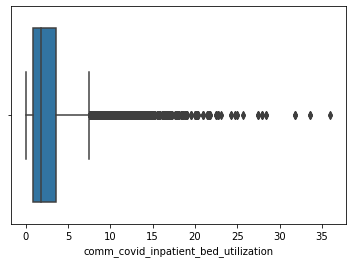

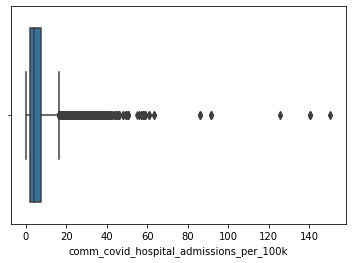

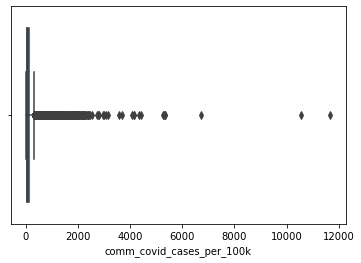

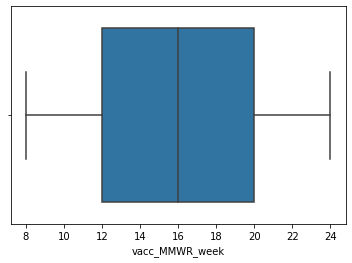

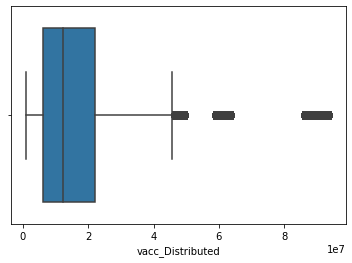

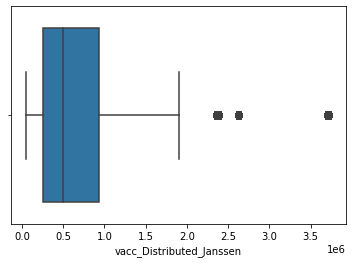

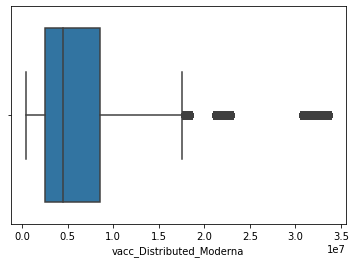

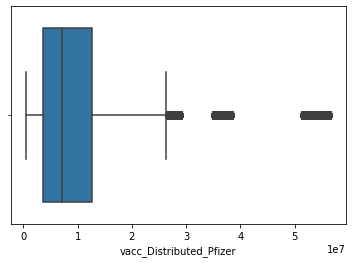

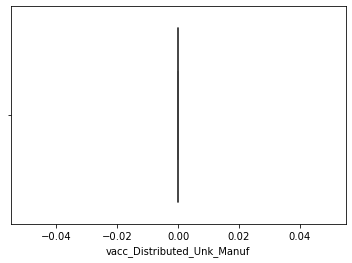

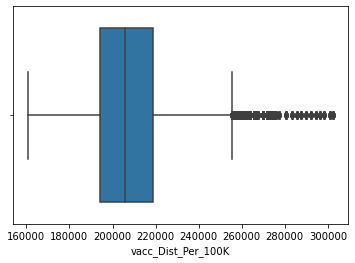

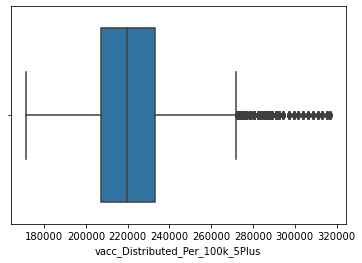

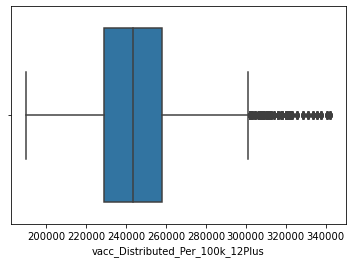

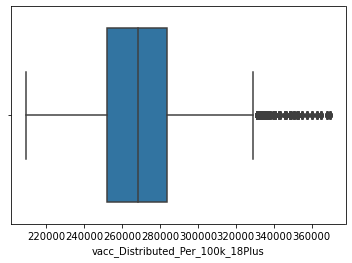

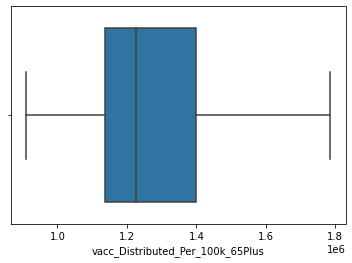

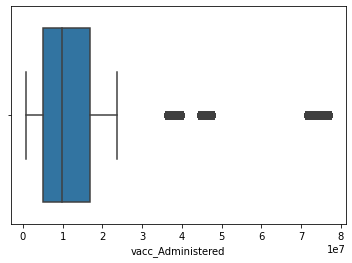

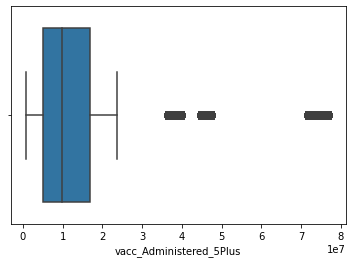

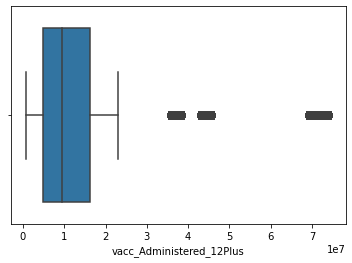

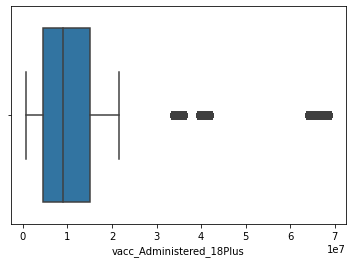

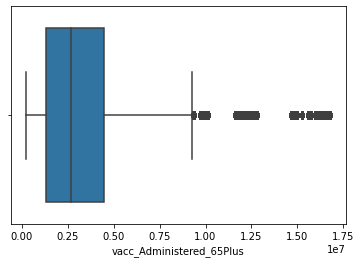

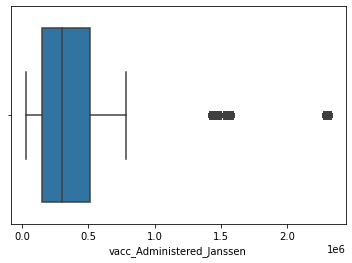

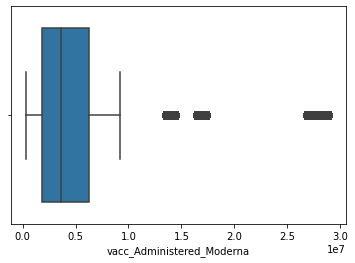

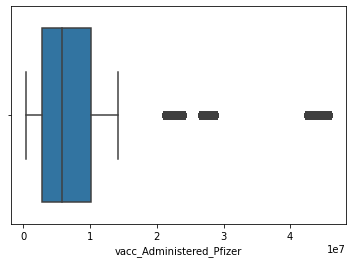

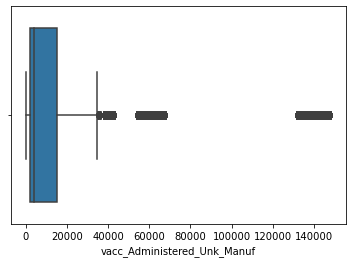

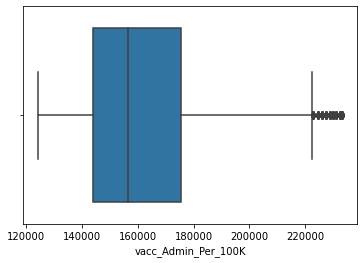

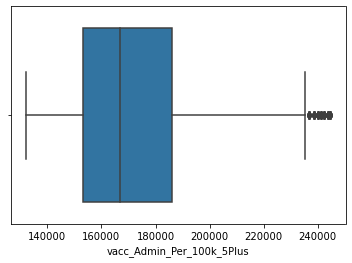

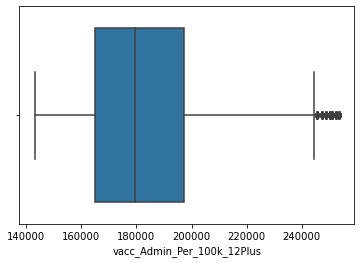

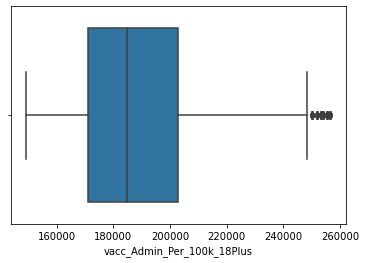

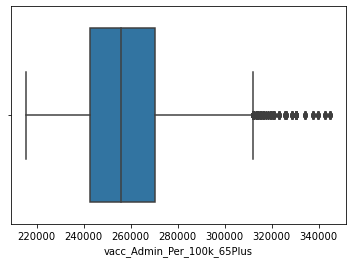

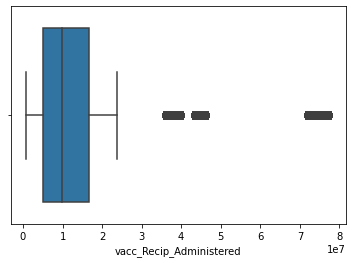

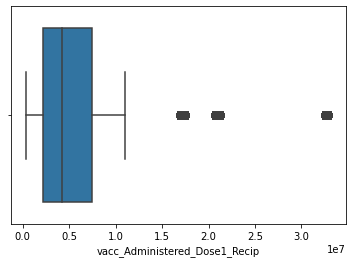

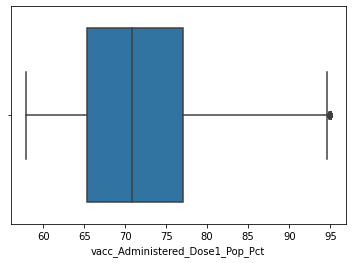

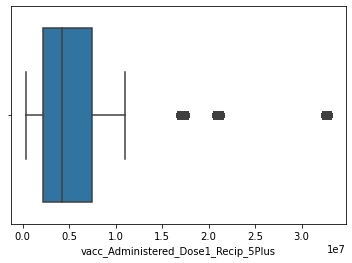

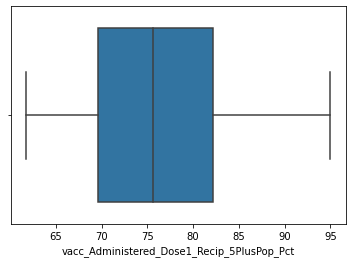

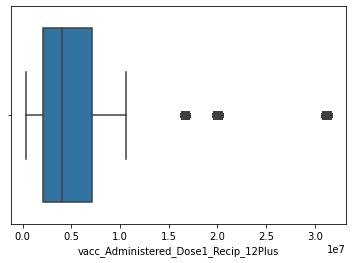

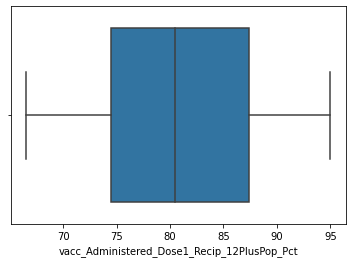

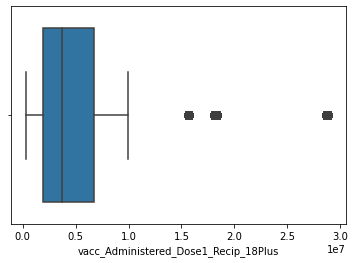

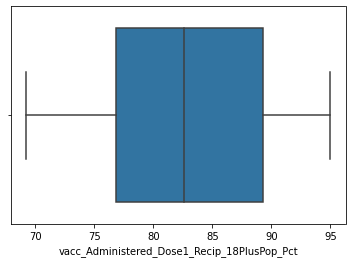

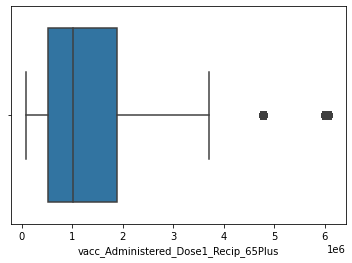

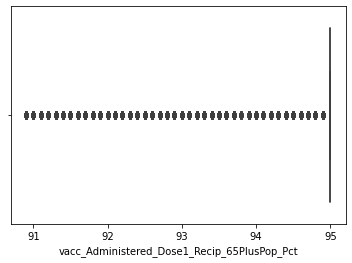

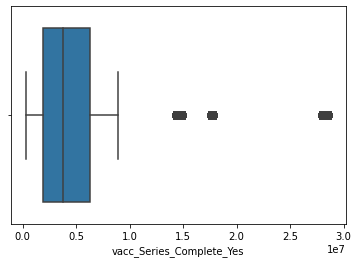

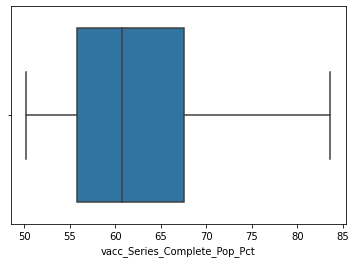

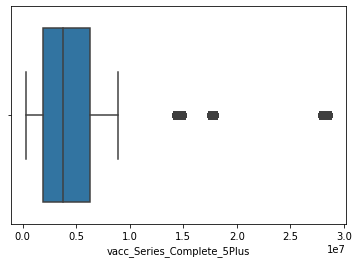

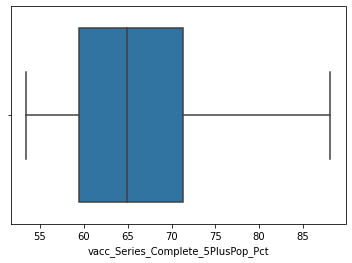

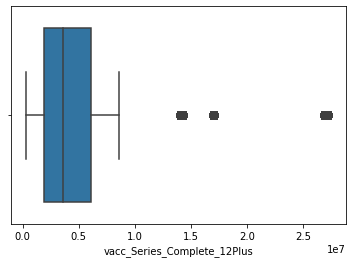

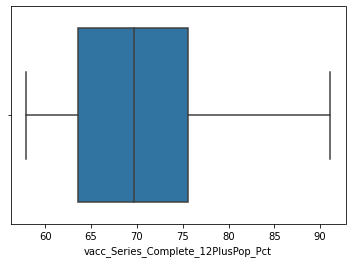

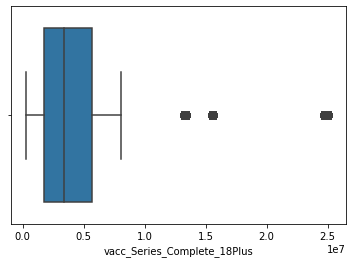

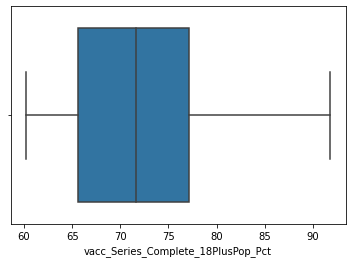

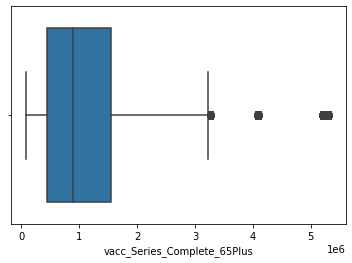

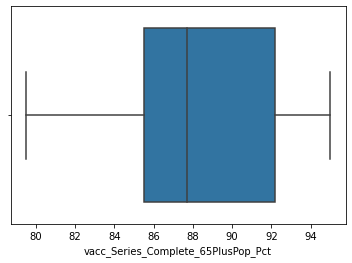

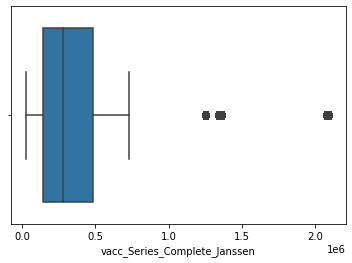

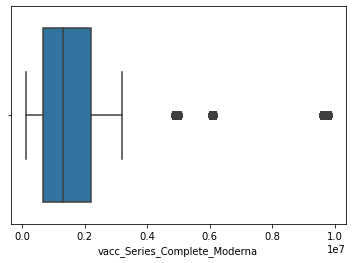

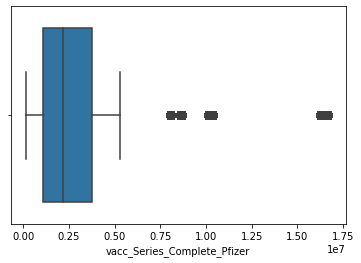

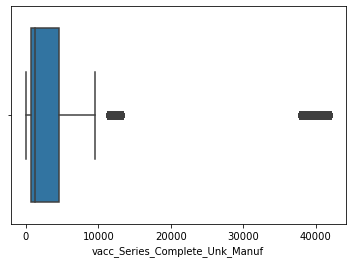

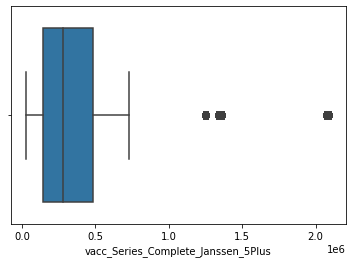

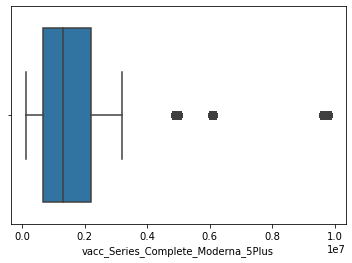

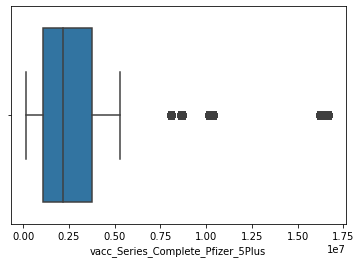

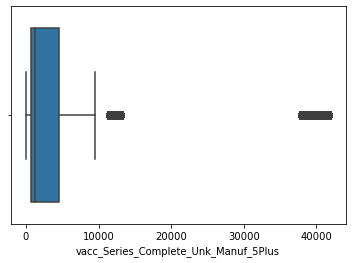

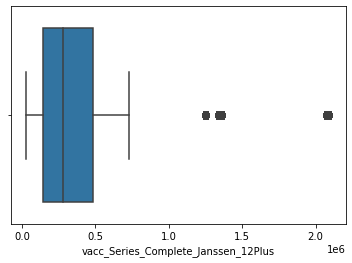

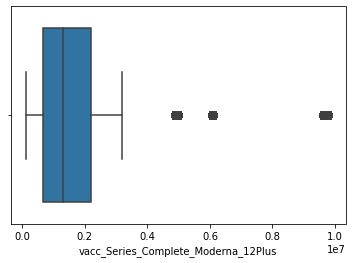

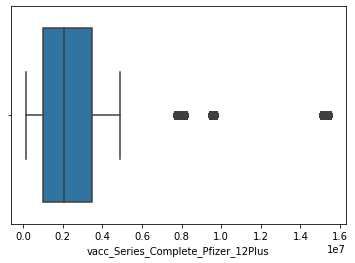

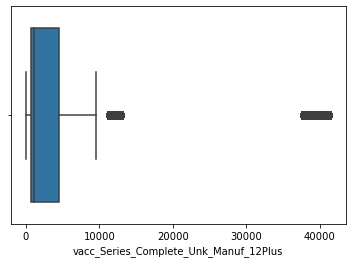

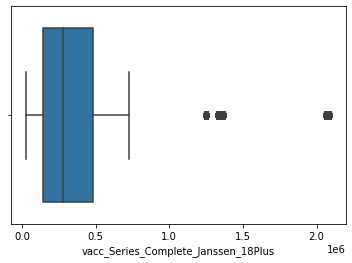

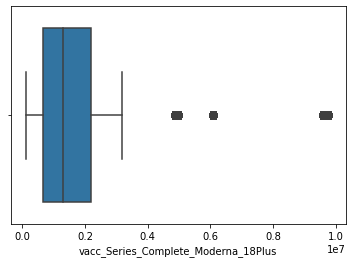

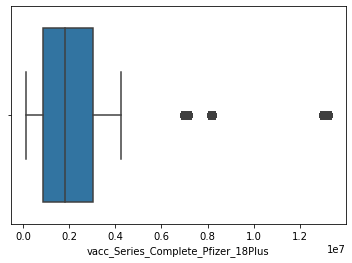

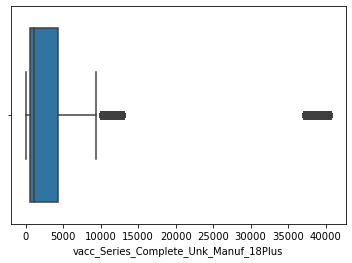

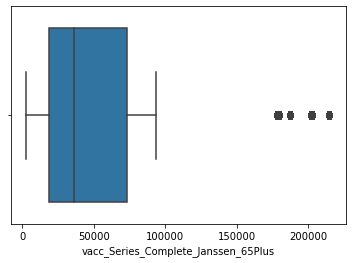

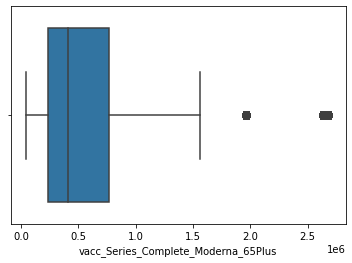

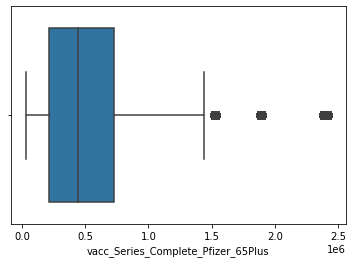

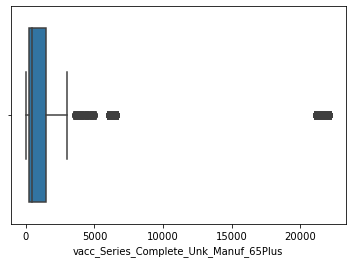

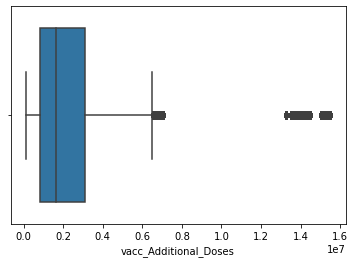

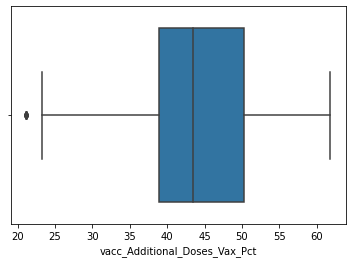

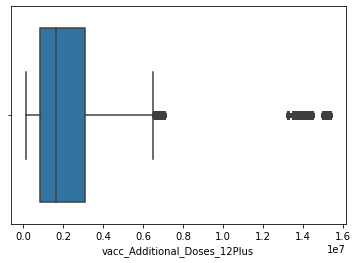

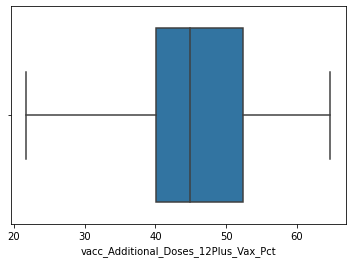

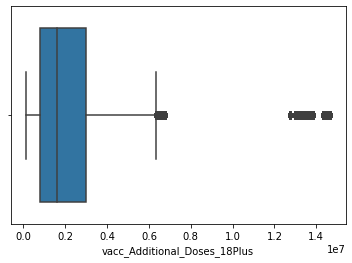

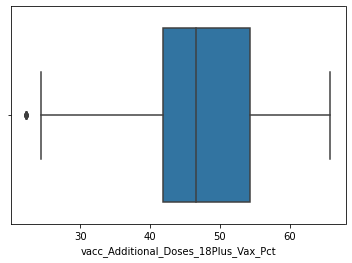

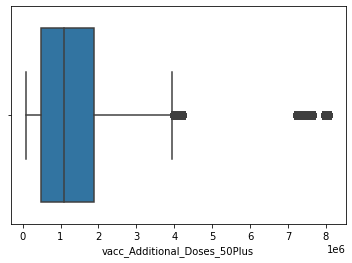

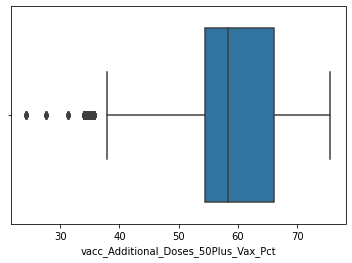

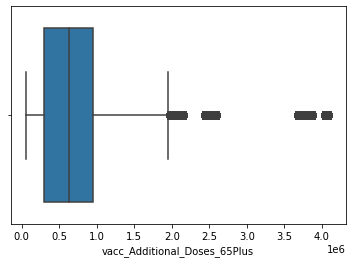

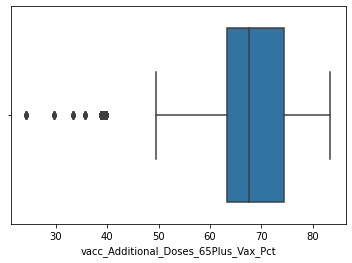

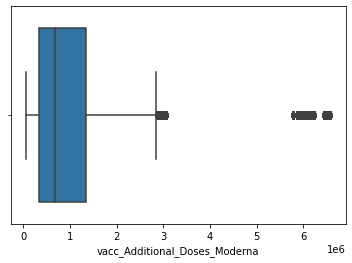

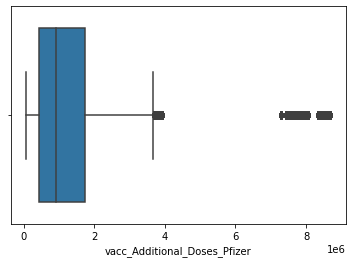

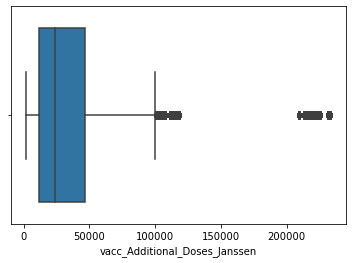

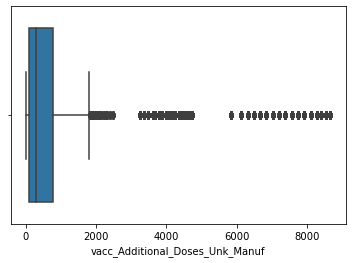

In [11]:
for x in conti:
    sns.boxplot(x= conti[x])
    plt.show()

## Categorical

In [14]:
categ = covid_df.drop(['comm_county_fips', 'comm_county_population',
       'comm_health_service_area_number',
       'comm_health_service_area_population',
       'comm_covid_inpatient_bed_utilization',
       'comm_covid_hospital_admissions_per_100k',
       'vacc_MMWR_week', 'vacc_Distributed', 'vacc_Distributed_Janssen',
       'vacc_Distributed_Moderna', 'vacc_Distributed_Pfizer',
       'vacc_Distributed_Unk_Manuf', 'vacc_Dist_Per_100K',
       'vacc_Distributed_Per_100k_5Plus', 'vacc_Distributed_Per_100k_12Plus',
       'vacc_Distributed_Per_100k_18Plus', 'vacc_Distributed_Per_100k_65Plus',
       'vacc_Administered', 'vacc_Administered_5Plus',
       'vacc_Administered_12Plus', 'vacc_Administered_18Plus',
       'vacc_Administered_65Plus', 'vacc_Administered_Janssen',
       'vacc_Administered_Moderna', 'vacc_Administered_Pfizer',
       'vacc_Administered_Unk_Manuf', 'vacc_Admin_Per_100K',
       'vacc_Admin_Per_100k_5Plus', 'vacc_Admin_Per_100k_12Plus',
       'vacc_Admin_Per_100k_18Plus', 'vacc_Admin_Per_100k_65Plus',
       'vacc_Recip_Administered', 'vacc_Administered_Dose1_Recip',
       'vacc_Administered_Dose1_Pop_Pct',
       'vacc_Administered_Dose1_Recip_5Plus',
       'vacc_Administered_Dose1_Recip_5PlusPop_Pct',
       'vacc_Administered_Dose1_Recip_12Plus',
       'vacc_Administered_Dose1_Recip_12PlusPop_Pct',
       'vacc_Administered_Dose1_Recip_18Plus',
       'vacc_Administered_Dose1_Recip_18PlusPop_Pct',
       'vacc_Administered_Dose1_Recip_65Plus',
       'vacc_Administered_Dose1_Recip_65PlusPop_Pct',
       'vacc_Series_Complete_Yes', 'vacc_Series_Complete_Pop_Pct',
       'vacc_Series_Complete_5Plus', 'vacc_Series_Complete_5PlusPop_Pct',
       'vacc_Series_Complete_12Plus', 'vacc_Series_Complete_12PlusPop_Pct',
       'vacc_Series_Complete_18Plus', 'vacc_Series_Complete_18PlusPop_Pct',
       'vacc_Series_Complete_65Plus', 'vacc_Series_Complete_65PlusPop_Pct',
       'vacc_Series_Complete_Janssen', 'vacc_Series_Complete_Moderna',
       'vacc_Series_Complete_Pfizer', 'vacc_Series_Complete_Unk_Manuf',
       'vacc_Series_Complete_Janssen_5Plus',
       'vacc_Series_Complete_Moderna_5Plus',
       'vacc_Series_Complete_Pfizer_5Plus',
       'vacc_Series_Complete_Unk_Manuf_5Plus',
       'vacc_Series_Complete_Janssen_12Plus',
       'vacc_Series_Complete_Moderna_12Plus',
       'vacc_Series_Complete_Pfizer_12Plus',
       'vacc_Series_Complete_Unk_Manuf_12Plus',
       'vacc_Series_Complete_Janssen_18Plus',
       'vacc_Series_Complete_Moderna_18Plus',
       'vacc_Series_Complete_Pfizer_18Plus',
       'vacc_Series_Complete_Unk_Manuf_18Plus',
       'vacc_Series_Complete_Janssen_65Plus',
       'vacc_Series_Complete_Moderna_65Plus',
       'vacc_Series_Complete_Pfizer_65Plus',
       'vacc_Series_Complete_Unk_Manuf_65Plus', 'vacc_Additional_Doses',
       'vacc_Additional_Doses_Vax_Pct', 'vacc_Additional_Doses_12Plus',
       'vacc_Additional_Doses_12Plus_Vax_Pct', 'vacc_Additional_Doses_18Plus',
       'vacc_Additional_Doses_18Plus_Vax_Pct', 'vacc_Additional_Doses_50Plus',
       'vacc_Additional_Doses_50Plus_Vax_Pct', 'vacc_Additional_Doses_65Plus',
       'vacc_Additional_Doses_65Plus_Vax_Pct', 'vacc_Additional_Doses_Moderna',
       'vacc_Additional_Doses_Pfizer', 'vacc_Additional_Doses_Janssen',
       'vacc_Additional_Doses_Unk_Manuf', 'comm_county', 'comm_county_fips', 'comm_state', 'comm_health_service_area', 
                      'vacc_State',
       'date_state_county_index', 'vacc_Administered'], axis=1)

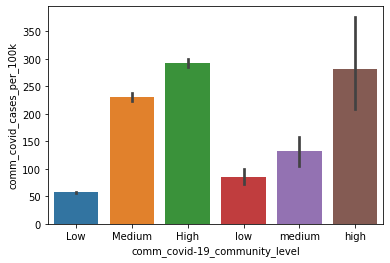

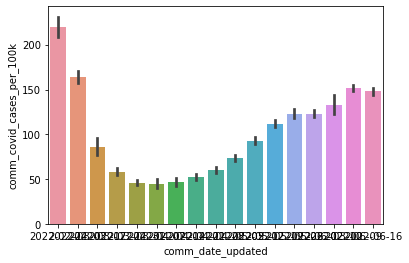

In [ ]:
for x in categ.columns:
    if x != 'comm_covid_cases_per_100k':
        sns.barplot(x= x, y = 'comm_covid_cases_per_100k', data = categ)
        plt.show()